# Review of the data science process

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

### Get Iris data

In [3]:
iris_data = pd.read_csv("iris.csv", names = ["sepal_l", "sepal_w", "petal_l", "petal_w", "class"])

### Summarize the data

In [4]:
iris_data.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Explore the data

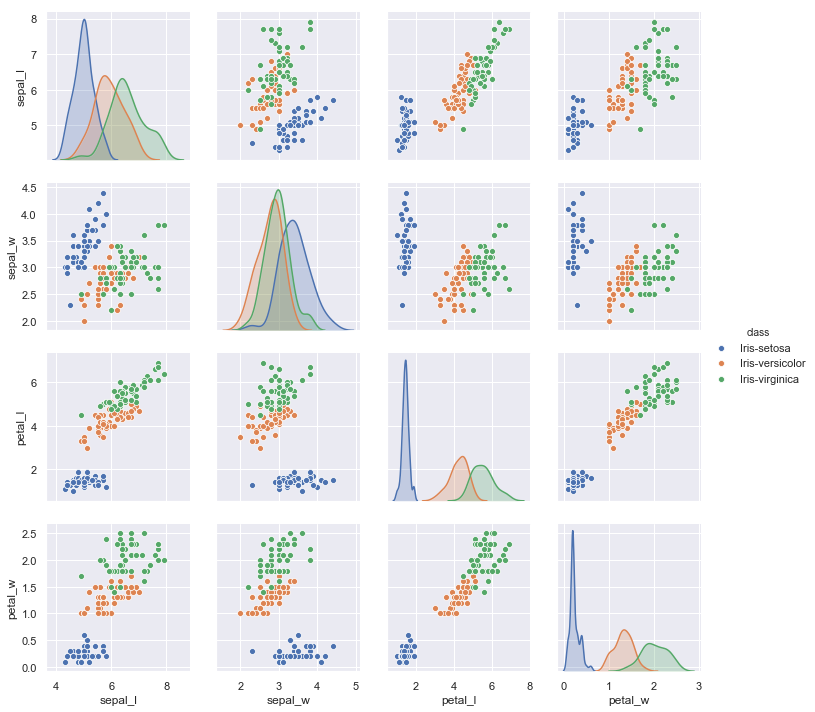

In [5]:
pair_plot = sns.pairplot(iris_data, hue='class')

### Clean, impute, transform data

In [ ]:
# OPTIONALLY impute the missing data

from sklearn.impute import SimpleImputer

fill_nan_mean = SimpleImputer(missing_values=np.nan, strategy="mean")

### Feature selection, feature engineering

In [ ]:
# drop returns a copy
# df = iris_data.drop(['some_feature'], axis=1) 

# feature engineering
# df["new_feature"] = df["feature_1"] * df["feature_2"]

# lambda function
# f = lambda x: x**2            
# df["new_feature"].map(f)  # for element-wise application

### Train/Test split

In [6]:
# Get X and y
X = iris_data[["sepal_l", "sepal_w", "petal_l", "petal_w"]].values

# Transform 'Iris-virginica' to be the positive class (binary classification)
y = iris_data['class'].map({"Iris-setosa":0, 'Iris-versicolor':1, 'Iris-virginica': 0}).values

In [8]:
from sklearn.model_selection import train_test_split

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3) #stratify=y)


### Scale/Standardize

In [11]:
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 
X_train_std[:5]

array([[ 2.26050169, -1.04854298,  1.77691682,  1.4226136 ],
       [-0.11897377,  1.8551145 , -1.14624252, -1.13955497],
       [-0.95179019,  1.37117159, -1.31488633, -1.2676634 ],
       [-1.18973773, -0.08065715, -1.31488633, -1.13955497],
       [-0.71384264, -0.80657152,  0.09047874,  0.26963774]])

### Models

In [19]:
#Instantiate the various models

# Logistic Regression
# --- Key Parameters ---
# C: the regularization strength (smaller values for greater regularization); default is 1.0
# penalty: used to specify the penalization used for regularizartion; l1 may be used for feature selection,
#          default is l2, 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1)

# Support Vector Machine
# --- Key Parameters ---
# C: how much penalty there is for misclassification (larger values for greater penalty); default is 1.0
# kernel: specifies the kernel type to be used (often 'rbf' or 'linear'); default is 'rbf'
# gamma: the coefficient for non-linear kernels
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1)

# Random Forest (ensemble of Decision Trees)
# --- Key Parameters ---
# n_estimators: the number of trees in the forest; default is 10
# max_depth: the depth of the tree; defualt is None, full expansion
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)

# k-Nearest Neighbor
# --- Key Parameters ---
# n_neighbors: number of neighbors to use; default is 5
# weights: weight function used; default is 'uniform'
        # 'uniform' means all points are weighted equally; '
        # 'distance' means closer points have greater influence;
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Neural Network
# --- Key Parameters ---
# hidden_layer_sizes: a tuple representing the number of nodes for respective layer; default is (100,)
# activation: the activation function for the hidden layer; defualt is 'relu'
        # usually 'relu', 'tanh', or 'logistic' ('sigmoid')
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

# Cross Validation

In [20]:
# 10-fold cross validation with a single algorithm

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is

In [14]:
display_scores(scores)

Scores: [0.58333333 0.5        0.90909091 0.8        0.7        0.7
 1.         0.6        0.8        0.7       ]
Mean: 0.7292424242424242
Standard deviation: 0.14449184254477299


In [21]:
# 10-fold cross validation with a list of algorithms

classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer:

In [16]:
# use a DataFrame to view the cross validation results

models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])
models_df

,1,2,3,4,5,6,7,8,9,10
LR,0.583333,0.5,0.909091,0.8,0.7,0.7,1.0,0.6,0.8,0.7
KNN,0.916667,1.0,0.818182,1.0,1.0,0.9,1.0,0.9,1.0,0.9
SVM,0.583333,0.5,0.818182,0.8,0.7,0.6,1.0,0.6,0.8,0.6
Forest,1.000000,1.0,0.818182,1.0,1.0,0.9,1.0,0.9,1.0,0.7
NN,0.916667,1.0,0.909091,1.0,0.9,0.8,1.0,0.8,1.0,0.8


In [22]:
# add a "Mean" column to the end of the DataFrame

models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.583333,0.5,0.909091,0.8,0.7,0.7,1.0,0.6,0.8,0.7,0.729242
KNN,0.916667,1.0,0.818182,1.0,1.0,0.9,1.0,0.9,1.0,0.9,0.943485
SVM,0.583333,0.5,0.818182,0.8,0.7,0.6,1.0,0.6,0.8,0.6,0.700152
Forest,1.000000,1.0,0.818182,1.0,1.0,0.9,1.0,0.9,1.0,0.7,0.931818
NN,0.916667,1.0,0.909091,1.0,0.9,0.8,1.0,0.8,1.0,0.8,0.912576


# Boxplot and Model Selection

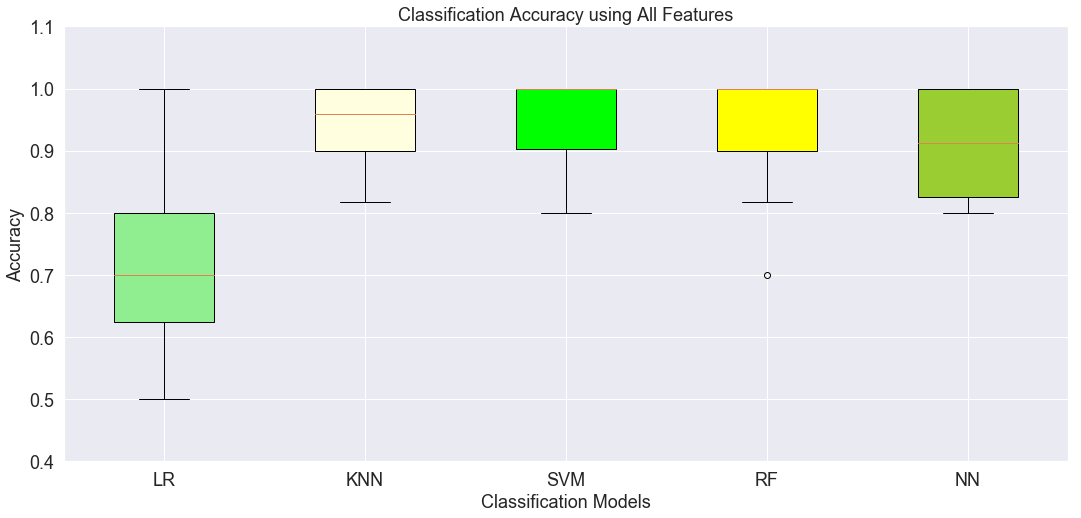

In [23]:
# BOXPLOT - visually comparing performance of the models

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'SVM', 'RF', 'NN'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

# Hyperparameter Tuning (Grid Search)


In [25]:
# hyperparameter tuning can be done manually or using Grid Search
# GridSearch returns the best model from among the various given hyperparameters

from sklearn.model_selection import GridSearchCV

# Grid Search
param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
#gs = GridSearchCV(estimator=log_reg, param_grid=[{'C': param_range}], scoring='accuracy', cv=3)

gs = GridSearchCV(estimator=knn, param_grid=[{'weights': ['distance', 'uniform'], 'n_neighbors': [3, 5, 7]}], scoring='accuracy', cv=3)

# GridSearch, by default, will return the best model, refit using ALL of the training data.
# Cross Validation, evaluates the returned GridSearch model
cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=10)

C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\r560847

array([1.        , 1.        , 0.90909091, 1.        , 1.        ,
       0.8       , 1.        , 0.9       , 1.        , 0.9       ])

### Fit the GridSearched model on ALL of the training data, and evaluate it using the Training and Test data

In [26]:
gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 0.9777777777777777


C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
#View the parameters that were dettermined to be the best following the GridSearch

gs.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

# Confusion Matrix

              precision    recall  f1-score   support

       other       0.96      0.96      0.96        27
  versicolor       0.94      0.94      0.94        18

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



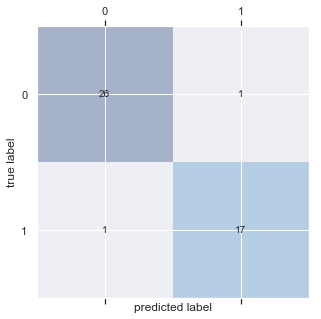

In [28]:
#Produce a Confusion Matrix to evaluate the model's performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["other", "versicolor"]))

### Train final model on FULL dataset (ALL Training and Test data combined)

In [ ]:
from sklearn.externals import joblib

# scale/standardize X (the original full dataset)
X_std = stdsc.fit_transform(X)

forest.fit(X_std, y)

# save the model to disk
joblib.dump(forest, 'final_forest_model.sav')
 
# load the model from disk
forest_from_saved = joblib.load('final_forest_model.sav')

# use the model as before
predictions = forest_from_saved.predict(X_new_customers)